In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 80

## Read images, split channels, merge

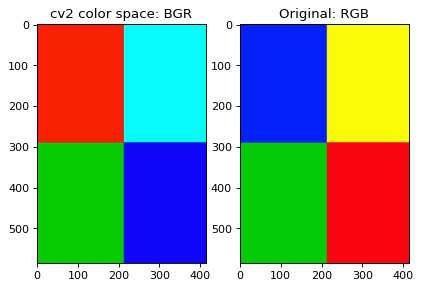

In [2]:
img = cv2.imread("./images/RGBY.jpg")
ori_img = plt.imread('./images/RGBY.jpg')

fig, axes = plt.subplots(1, 2, figsize=(6, 4))
axes[0].imshow(img)
axes[0].set_title("cv2 color space: BGR")

# axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(ori_img)
axes[1].set_title("Original: RGB")
plt.show()

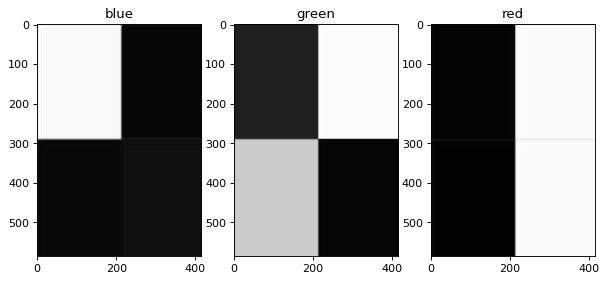

In [3]:
bgr = cv2.split(img)
name = ['blue', 'green', 'red']
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
for i, c in enumerate(bgr):
    axes[i].imshow(c, cmap='gray')
    axes[i].set_title(name[i])

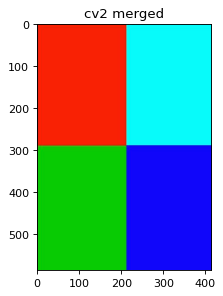

In [4]:
img_merged = cv2.merge(bgr)
plt.figure(figsize=(3, 4))
plt.imshow(img_merged)
plt.title('cv2 merged')
plt.show()

## Resize

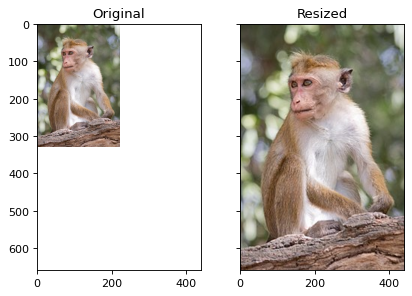

In [5]:
img = cv2.imread("images/monkey.jpg", 1) # 0: gray, 1: BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized = cv2.resize(
    img,
    None, # output image size
    fx=2, # scale factor along x
    fy=2, # scale factor along y
    interpolation=cv2.INTER_CUBIC, # shrink: INTER_AREA, enlarge: INTER_LINEAR,CUBIC
)

fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharex=True, sharey=True)
axes[0].imshow(img)
axes[0].set_title('Original')
axes[1].imshow(resized)
axes[1].set_title('Resized')
plt.show()

## Denoising

Take a kernel(e.g. 3x3 size matrix), colvolve with original image.

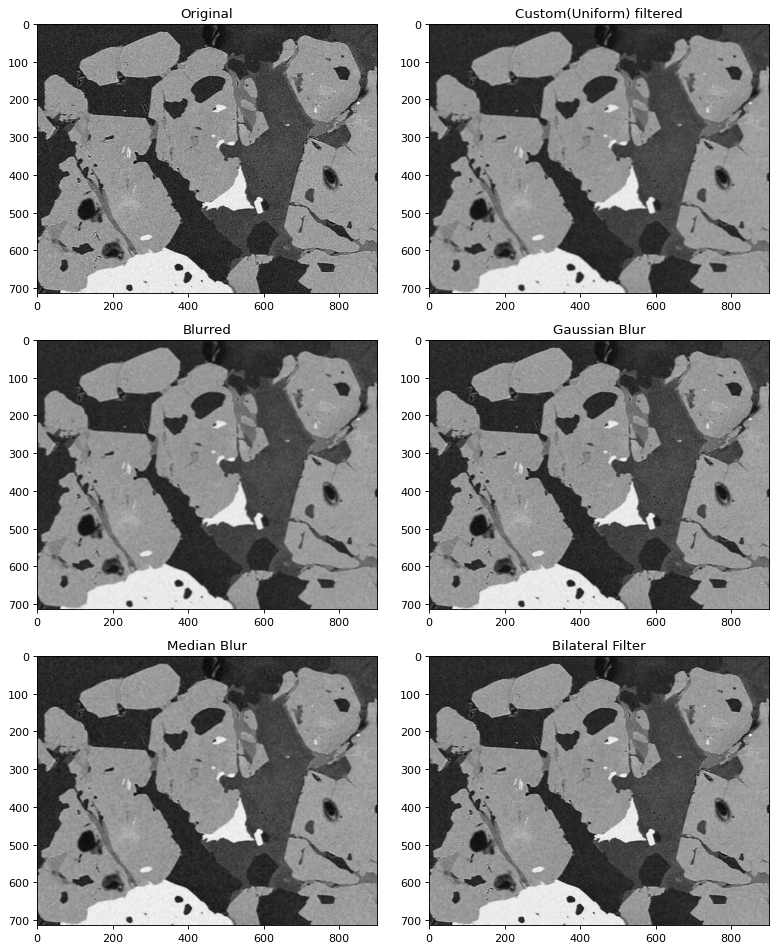

In [6]:
img = cv2.imread('images/BSE_Google_noisy.jpg', 1)

kernel_size = 5

# custom(uniform) filter
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / kernel_size**2 
img_custom = cv2.filter2D(img, -1, kernel)
# Blur
blur = cv2.blur(img, (kernel_size, kernel_size))
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
# Median Blur (non linear)
median_blur = cv2.medianBlur(img, kernel_size)
# Bilateral Blur (non linear)
bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)

nrow = 3
ncol = 2
fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*5, nrow*4), dpi=80)
axes = axes.ravel()
axes[0].imshow(img)
axes[0].set_title('Original')
axes[1].imshow(img_custom)
axes[1].set_title('Custom(Uniform) filtered')
axes[2].imshow(blur)
axes[2].set_title('Blurred')
axes[3].imshow(gaussian_blur)
axes[3].set_title('Gaussian Blur')
axes[4].imshow(median_blur)
axes[4].set_title('Median Blur')
axes[5].imshow(bilateral_blur)
axes[5].set_title('Bilateral Filter')
plt.tight_layout()
plt.show()

- Bilateral filter  

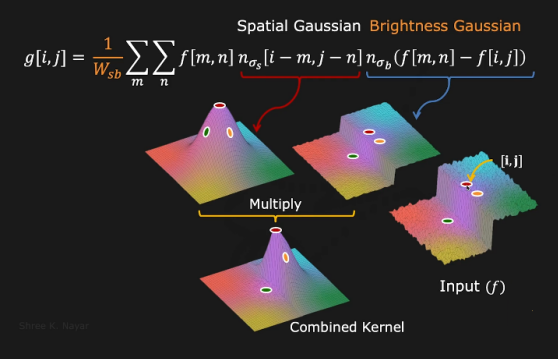

ref: https://www.youtube.com/watch?v=7FP7ndMEfsc&ab_channel=FirstPrinciplesofComputerVision

## Edge detection

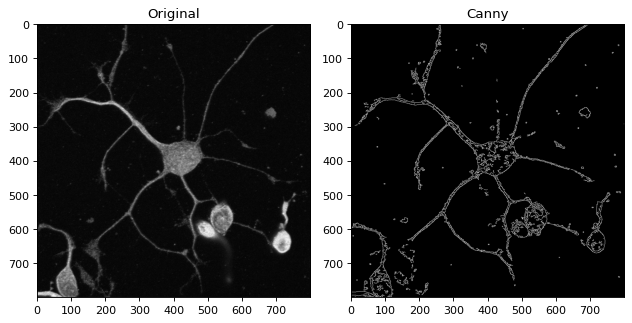

In [7]:
img = cv2.imread('images/Neuron.jpg', 0)

edges = cv2.Canny(img, 100, 200)

nrow = 1
ncol = 2
fig, axes = plt.subplots(nrow, ncol, figsize=(ncol*4, nrow*4))
axes = axes.ravel()
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny')
plt.tight_layout()
plt.show()

## Histogram equalization

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

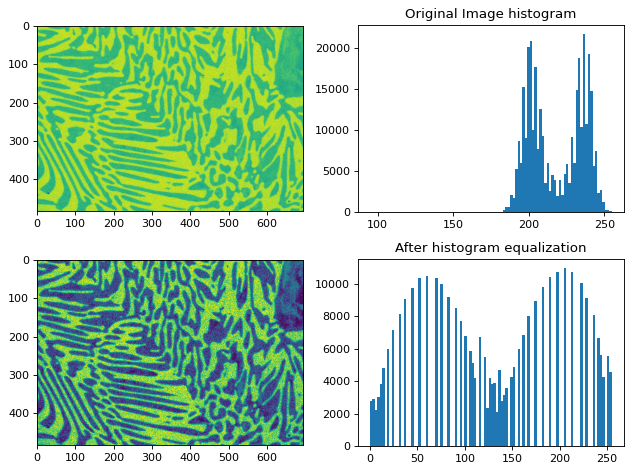

In [9]:
img = cv2.imread("images/Alloy.jpg", 0)
eq_img = cv2.equalizeHist(img)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()
axes[0].imshow(img)
axes[1].hist(img.flatten(), bins=100)
axes[1].set_title("Original Image histogram")
axes[2].imshow(eq_img)
axes[3].hist(eq_img.flatten(), bins=100)
axes[3].set_title("After histogram equalization")
plt.tight_layout()
plt.show()

### CLAHE
- Contrast Limited Adaptive Histogram Equalization

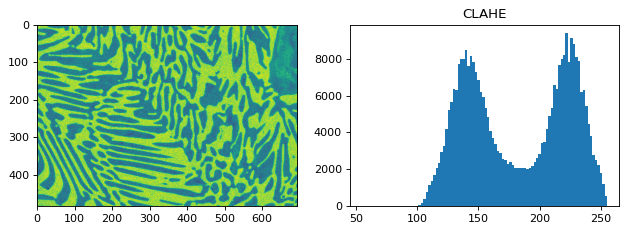

In [10]:
clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8, 8))
cl_img = clahe.apply(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(cl_img)
axes[1].hist(cl_img.flatten(), bins=100)
axes[1].set_title("CLAHE")
plt.tight_layout()
plt.show()

### Set Threshold
Set the threshold directly by looking at the histogram or use OTSU to determine the threshold.

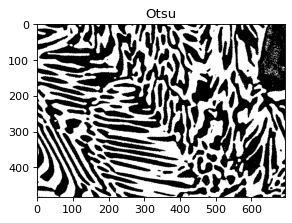

In [11]:
# _, thresh1 = cv2.threshold(cl_img, 190, 150, cv2.THRESH_BINARY)
# _, thresh2 = cv2.threshold(cl_img, 190, 255, cv2.THRESH_BINARY_INV)

_, thresh_otsu = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(4, 3))
plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu")
plt.show()

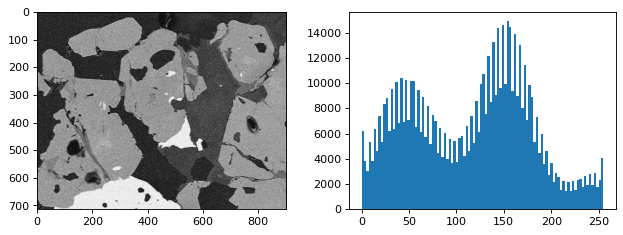

In [12]:
img = cv2.imread("images/BSE_Google_noisy.jpg", 0)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(img, cmap='gray')
axes[1].hist(img.flatten(), bins=100)
plt.tight_layout()
plt.show()

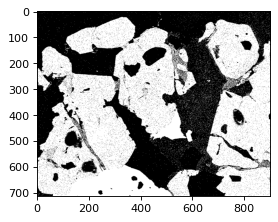

In [13]:
_, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(4, 3))
plt.imshow(th, cmap='gray')
plt.show()

## Morphological operations

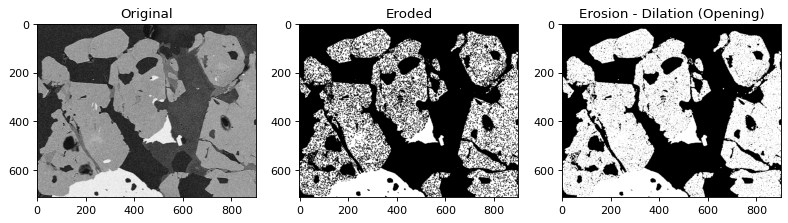

In [14]:
kernel = np.ones((3, 3), dtype=np.uint8)
erosion = cv2.erode(th, kernel, iterations=1)
# dilation = cv2.dilate(erosion, kernel, iterations=1)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(erosion, cmap='gray')
axes[1].set_title("Eroded")
axes[2].imshow(opening, cmap='gray')
axes[2].set_title("Erosion - Dilation (Opening)")
plt.show()

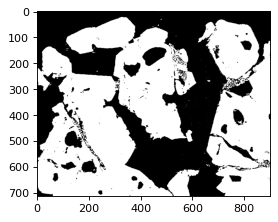

In [15]:
# Histogram-based segmentation after denoising
median = cv2.medianBlur(img, 3)
_, th = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(4, 3))
plt.imshow(th, cmap='gray');

## Keypoints, Detectors and Descriptors

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Detector

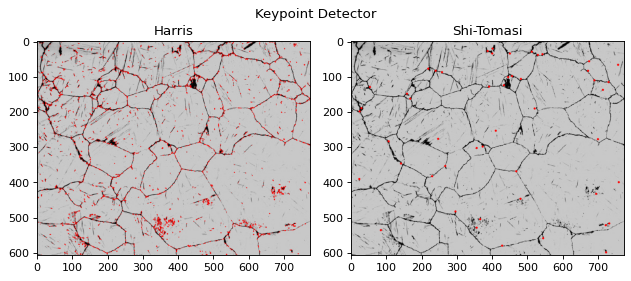

In [17]:
img = cv2.imread("images/grains.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

harris = cv2.cornerHarris(img_gray, 2, 3, 0.04)
corners = cv2.goodFeaturesToTrack(img_gray, 50, 0.01, 10)

img_copy1 = img.copy()
img_copy1[harris > 0.01 * harris.max()] = [255, 0, 0]

img_copy2 = img.copy()
for c in corners:
    c = c.astype(int)
    x, y = c.ravel()
    cv2.circle(img_copy2, (x, y), 3, 255, -1)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_copy1)
axes[0].set_title("Harris")
axes[1].imshow(img_copy2)
axes[1].set_title("Shi-Tomasi")
plt.suptitle("Keypoint Detector", y=0.9)
plt.tight_layout()
plt.show()

### Detector + Descriptor

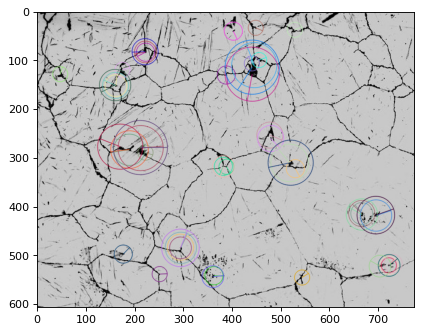

In [18]:
# ORB (Fast detector + Brief descriptor)
# https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
orb = cv2.ORB_create(50)

kp, des = orb.detectAndCompute(img_gray, None)
img_with_kp = cv2.drawKeypoints(img, kp, None, 
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_with_kp);

## Registration

1. Find keypoints and describe.  
2. Match keypoints - Brute force matcher  
3. RANSAC (reject bad keypoints)  
4. Register two images (use homology)

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

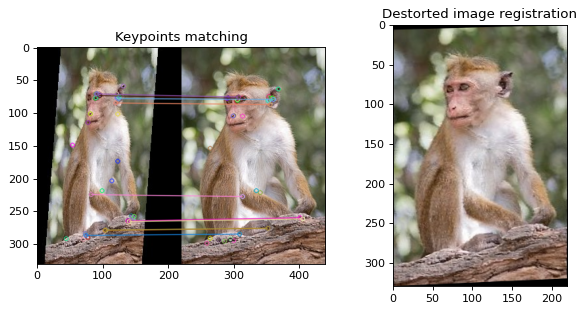

In [20]:
img_o = cv2.imread("images/monkey.jpg")
img_o = cv2.cvtColor(img_o, cv2.COLOR_BGR2RGB)
img_d = cv2.imread("images/monkey_distorted.jpg")
img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB)

img_gray_o = cv2.cvtColor(img_o, cv2.COLOR_RGB2GRAY)
img_gray_d = cv2.cvtColor(img_d, cv2.COLOR_RGB2GRAY)


# 1. Find keypoints and describe
orb = cv2.ORB_create(50)
kp_o, des_o = orb.detectAndCompute(img_gray_o, None)
kp_d, des_d = orb.detectAndCompute(img_gray_d, None)


# 2. Match keypoints
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

matches = matcher.match(des_d, # query descriptors
                        des_o, # train descriptors
                        None) 
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img_d, kp_d, img_o, kp_o,
                              matches[:10], None)


# 3. Reject bad keypoints
points_1 = np.zeros((len(matches), 2), dtype=np.float32)
points_2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points_1[i, :] = kp_d[match.queryIdx].pt
    points_2[i, :] = kp_o[match.trainIdx].pt

h, mask = cv2.findHomography(points_1, points_2, cv2.RANSAC)


# 4. Use homography
height, width, channels = img_o.shape # from reference image
img_d_reg = cv2.warpPerspective(img_d, h, (width, height))


# Plot results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_matches)
axes[0].set_title("Keypoints matching")
axes[1].imshow(img_d_reg)
axes[1].set_title("Destorted image registration")
plt.tight_layout()
plt.show()